In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm

In [157]:
data=pd.read_csv("data/heart.csv")

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [159]:
data.head()
data['target'] = data['output']
data['output'].drop

<bound method Series.drop of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64>

In [161]:
# Check the number of null values in each column
null_counts = data.isnull().sum()
print("Null Value Counts:")
print(null_counts)

# Drop the 'output' column
data.drop('output', axis=1, inplace=True)


Null Value Counts:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
target      0
dtype: int64


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


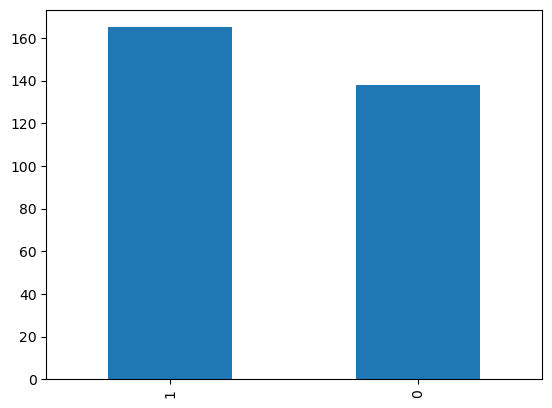

In [163]:
data['target'].value_counts().plot.bar()
data.head()

In [164]:
X_data=data.drop('target',axis=1)
Y_data=data['target']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.30)

# SVM

In [166]:

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data to dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [167]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
confusion_matrix(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.89      0.85      0.87        59

    accuracy                           0.84        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.84      0.84      0.84        91



In [168]:
from sklearn.model_selection import ShuffleSplit,GridSearchCV
from sklearn.metrics import f1_score,make_scorer

In [169]:
params={
    'gamma':[0.1,0.01,0,0.001,0.0001],
    'C':[0.1,10,100,1000],
    'kernel':['rbf']
}
grid=GridSearchCV(clf,param_grid=params,scoring=make_scorer(f1_score))

In [170]:
grid_clf=grid.fit(X_train,y_train)

In [171]:
grid_clf.best_estimator_

SVC(C=100, gamma=0.001)

In [172]:
from sklearn.model_selection import cross_val_score

grid_best=grid_clf.best_estimator_
y_grid_pred=grid_best.predict(X_test)
print(confusion_matrix(y_grid_pred,y_test))
print(classification_report(y_grid_pred,y_test))
scores = cross_val_score(grid_best, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

[[26  5]
 [ 9 51]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        31
           1       0.91      0.85      0.88        60

    accuracy                           0.85        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.85      0.85      0.85        91

Cross-Validation Scores: [0.88372093 0.81395349 0.85714286 0.78571429 0.80952381]
Mean Accuracy: 0.8300110741971206


# Logistic regression

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings

# Suppress the convergence warning

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression with increased max_iter
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Generate classification report
print("Logistic Regression:")
print(classification_report(y_pred_logreg, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_pred_logreg, y_test))

# Perform cross-validation
scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72        34
           1       0.84      0.82      0.83        57

    accuracy                           0.79        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.79      0.79      0.79        91

Confusion Matrix:
[[25  9]
 [10 47]]
Cross-Validation Scores: [0.86046512 0.8372093  0.85714286 0.76190476 0.83333333]
Mean Accuracy: 0.8300110741971206


# Decision Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Make predictions with the best model
y_pred_dt = best_model.predict(X_test)

# Generate classification report
print("Decision Tree:")
print(classification_report(y_pred_dt, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_pred_dt, y_test))

# Perform cross-validation with the best model
scores = cross_val_score(best_model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree:
              precision    recall  f1-score   support

           0       0.71      0.64      0.68        39
           1       0.75      0.81      0.78        52

    accuracy                           0.74        91
   macro avg       0.73      0.72      0.73        91
weighted avg       0.73      0.74      0.73        91

Confusion Matrix:
[[25 14]
 [10 42]]
Cross-Validation Scores: [0.8372093  0.72093023 0.69047619 0.64285714 0.83333333]
Mean Accuracy: 0.7449612403100776


# Naive Bayes

In [185]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Generate classification report
print("Naive Bayes:")
print(classification_report(y_pred_nb, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_pred_nb, y_test))
scores = cross_val_score(nb, X_train, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Naive Bayes:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        39
           1       0.80      0.87      0.83        52

    accuracy                           0.80        91
   macro avg       0.80      0.79      0.80        91
weighted avg       0.80      0.80      0.80        91

Confusion Matrix:
[[28 11]
 [ 7 45]]
Cross-Validation Scores: [0.8372093  0.86046512 0.80952381 0.80952381 0.80952381]
Mean Accuracy: 0.8252491694352159
